<a href="https://colab.research.google.com/github/easyhardhoon/machine_learning_basic/blob/master/ML_RE5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ML10~ML11

**1. 배치 vs 입력데이터 1개 최종 정리**

<CNN을 사용하지 않는  Net 기준입니다>

load_mnist에서, x_train을 default로 flatten = True로 전처리후 데이터를 받아옵니다.

In [ ]:
import numpy as np
from mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

In [ ]:
x_train.shape
#default로 flatten = true 되는 모습. 

(60000, 784)

즉, 2차원 데이터의 x_train의 

y축은 데이터축(데이터 60,000개),

x축은 각 데이터의 정보축(채널[1], input_y[28], input_x[28]이 flatten )입니다.

---

입력 데이터가 1개이면 자연스레 1차원 배열(784,)이 하나하나 input으로 Net에 들어가지만

배치형태라면(ex 5개씩 (5,784)), 1차원 배열 5개, 즉 2차원 배열이 input으로 Net에 들어간다.

---

만약 flatten = false라면 3차원, 4차원 데이터이기 때문에, CNN신경망이 필요할것 같다.

**2. softmax-with-loss 계층**

softmax 활성화 함수 + loss 함수(cross_entropy_error)로 이루어진 계층

(softmax 계층은 보통 맨 마지막 출력층의  활성화함수에 사용합니다.)

이 계층의 역전파는 **출력값과 정답 레이블의 오차**이다.

사실 이렇게 나오도록 그동안의 활성화함수와 손실함수를 설계했다.

⭕신경망 학습의 목적 : **신경망의 출력이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것**

---

만약 정답 레이블이 (0,1,0) 이고 softmaxwithloss계층이 (0.3, 0.2, 0.5)를 출력했다면

(모델의 최종 예측값과 같은 말이다. 순전파)

softmaxwithloss계층의 역전파는 (0.3, -0.8, 0.5)라는 커다란 **오차를 전파.** 

결과적으로 softmax계층의 앞 계층들은 그 "큰" 오차로부터 "큰" 깨달음을 얻게 된다

⭕ **이 값을 기준으로 layers의 역전파 전파시작**

⭕**이 오차를 기준으로 parameter 기울기를 구하고 update하여 오차를 줄여나간다**

**numerical_gradient는 loss함수에 대한 parameter 기울기**

**gradient는 오차에 대한 parameter 기울기**

⭕**두 경우 모두, parameter 최적화를 통한 오차 줄이기 논리**


In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y  = None
    self.t = None
  def forward(self,x,t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size #
    return dx

위 코드에서 dx = (self.y - self.t) / batch_size 해주는 이유

batch는, N개의 데이터를 한꺼번에 검사하는 개념이기 때문이다.

**3. axis에 대하여**

In [ ]:
import numpy as np
#argmax(axis=0)
a = np.array([[1,2,3],[4,5,6]])
a1 = a.argmax(axis=0) #0번째 축인 데이터를 기준으로 큰 값의 인덱스를 리턴
print(a1) # ex) 1보다 4가 크니까 4의 인덱스인 "1"
a2 = a.argmax(axis=1) #1번쨰 축인 값을 기준으로 큰 값의 인덱스를 리턴. 
print(a2) # ex) 3이 1,2 보다 크니까 3의 인덱스인 "2"
#sum과 함께
dY = np.array([[1,2,3],[4,5,6]])
dB = np.sum(dY,axis=0) # 0번쨰 축인 데이터를 기준. 데이터끼리 더한다.
print(dB)
db = np.sum(dY,axis=1) # 1번쨰 축인 값 기준. 각 데이터 내부의 값 끼리 더한다.
print(db)
# 기본적으로 argmax든 sum이든 1차원 배열 형태를 리턴합니다.

[1 1 1]
[2 2]
[5 7 9]
[ 6 15]


In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1: #(24,) 이면 (1,24)로. 배치형식으로 맞춘다.
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환. 
    # 원핫인코딩 false 일때처럼 1차원 배열 형식으로 맞춘다.
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
# 위 코드로, 원핫인 코딩이 되어있는 정답 레이블을 1차원 배열로 바꾸어
# (원핫인코딩 false 일때의 논리로 들어간다)
# 원핫인코드 여부와 관계없이 통일된 loss함수를 만들수 있었다.

위 코드에서 볼 수 있듯,

⭕**원핫인코딩 & 배치 여부가 모두 통합된 통일된 코드가 완성된다. 앞으로의 코드는 모두 이러한 통일된 코드이다**

앞서 load_mnist에서 default로 one_hot_label 가 false 였는데, 그 이유를 알 수 있다.

false를 기준으로 코드가 맞추어져 있다.

**4.지금까지의 코드 복습**

기본적으로, Affine, Relu, softmax, cross_entropy_error 등의 코드에서

배치 여부, 원핫인코딩 여부를 모두 고려해 통합하였습니다. (앞의 논리가 맞음!!)

자세한 코드는 ML10에 나와있습니다.

아래는 역전파법을 사용한 학습 구현입니다

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
    self.params['b2'] = np.zeros(output_size)

    self.layers = OrderedDict() 
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1']) 
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    self.lastLayer = SoftmaxWIthLoss() 

  def predict(self,x):
    for layer in self.layers.values():
      x = layer.forward(x) 
    return x
  def loss(self,x,t):
    y = self.predict(x)
    return self.lastLayer.forward(y,t) 
  def accuracy(self,x,t):
    y = self.predict(x)
    y = np.argmax(y,axis=1)
    if t.ndim != 1:
      t = np.argmax(t,axis=1) 
    accuracy = np.sum(y==t)/float(x.shape[0])
    return accuracy

  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads

  def gradient(self,x,t):
    self.loss(x,t)
    dout = 1
    dout = self.lastLayer.backward(dout) 
    layers = list(self.layers.values()) 
    layers.reverse() 

    for layer in layers:
      dout = layer.backward(dout) 
    grads = {} 
    grads['W1'] = self.layers['Affine1'].dW 
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
    return grads

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size= 784, hidden_size = 50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list= []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size,batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  grad = network.gradient(x_batch,t_batch) 
  
  for key in ('W1','b1','W2','b2'):
    network.params[key] -= learning_rate * grad[key] 
  loss = network.loss(x_batch, t_batch) 
  train_loss_list.append(loss)

  if i%iter_per_epoch == 0: 
    train_acc = network.accuracy(x_train,t_train)
    test_acc = network.accuracy(x_test,t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(train_acc,test_acc)

위 코드에서

▶numerical_gradient


    실제론 numerical_gradient는 매우 느리기 때문에 gradient를 사용한다.

    numerical_gradient(수치 미분)은 오차역전파법이 정확히 구현되었는지 확인할때 쓰인다.

    (기울기 확인 작업)


▶accuracy

    데이터별 최대 값의 인덱스만 끌어모아 1차원 배열 하나 생성. 마찬가지로 batch를 위한 코드라고 볼 수 있다.
    (배치이든 아니든 1차원 배열로 만들어지기 때문)
    (배치 여부를 고려한 통합코드)

    또한 원핫인코딩=true인 정답 레이블이 들어온다면 false 상태로 만든다
    (원핫인코딩 여부를 고려한 통합코드)

    최종적으로 출력데이터 & 정답레이블을 둘 다 1차원 배열로 만들어 간편하게 인덱스 비교를 통해 정확도를 산출한다.

    또한 accuracy산출할때,
    출력데이터의 최대 인덱스만 필요하기 때문에 softmax 함수는 굳이 적용안시킨 모습입니다.
    (softmax는 단조증가함수)

▶gradient


    이제는 softmax-with-loss 계층을 사용하기 때문에,
    gradient든 numerical_gradient든 loss까지 forward시키고, 편미분을하든 backward를 하든한다.

    즉, 추후의 loss.backward()코드가 적용되도록 기초코드가 완성되었다.
  

**5. optimizer**

역전파를 통해 매개변수의 기울기를 구하면, 이 기울기 정보를 토대로 어떻게 parameter를 갱신할지를 다룬다 

⚾SGD

단순히 기울어진 방향으로 일정 거리만 가겠다

방향에 따라 수시로 기울기가 달라지는 함수의 경우, SGD방식은 비효율적이다

In [ ]:
class SGD:
  def __init__(self,lr=0.01):
    self.lr = lr 
  def update(self,params,grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

⚾Momentum

기울어진 방향으로 물체가 가속된다

SGD + 물리법칙(속도)

**학습률은 고정되어있다는 점에 주목**

In [ ]:
class Momentum:
  def __init__(self,lr=0.01,momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  def update(self,params,grads):
    if self.v is None:
      self.v = {}
      for key,val in params.items():
        self.v[key] = np.zeros_like(val) 
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
      params[key] += self.v[key]

⚾AdaGrad

학습을 진행하면서 학습률을 점차 줄여나간다

parameter 중 많이 움직인 것은 학습률을 낮아지게 만드는 원리

In [ ]:
class AdaGrad:
  def __init__(self,lr=0.01):
    self.lr = lr
    self.h = None
  def update(self,params,grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val) 
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) +  1e-7) 

⚾Adam

momentum + Adagrad

---

위의 4가지 방법 말고도, https://pytorch.org/docs/stable/optim.html 을 보면 다양한 optimizer가 있습니다.

각 기법들은 다양한 장단점이 있어서, 풀어야할 문제의 특징에 따라 적절한 기법을 골라서 사용합니다

✅ 학습률등의 하이퍼 파라미터, 신경망의 구조등을 어떻게 설정하느냐에 따라서도 결과가 달라집니다.

✅ parameter(매개변수. 가중치)의 초깃값을 어떻게 설정하느냐에 따라서도 결과가 달라집니다.

**6. 가중치 초깃값 설정**

기본적으로, 각 가중치(parameter)의 초깃값을 최대한 작은 값에서 시작하는게 일반적이며,

모두 다른 값으로 세팅해야하는게 좋다.

모두 같게 세팅해버리면, 역전파일때 층마다의 가중치가 똑같이 갱신되기 때문에 
갱신을 거쳐도 서로 같은 값을 유지한다.

(곱셈 노드 참조)

---

즉 가중치를 여러개 갖는 의미를 사라지게 한다.

그래서 지금까지의 가중치 초깃값을 

0.01 ^ np. random.randn(10,100)을 사용하였다.

---


▶1. 가중치의 표준편차를 1로 설정했을때

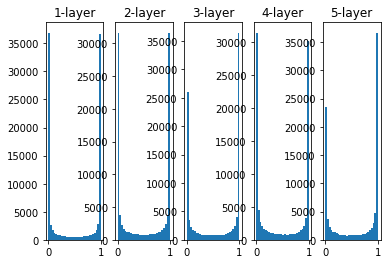

sigmoid 시각화 



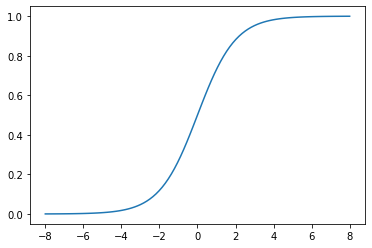

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) 
node_num = 100 
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) * 1 # 여기에 표준편차를 곱해주는 식이다.
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z 

for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

print("sigmoid 시각화 \n")

x = np.linspace(-8, 8, 100)  
sig = sigmoid(x)  

plt.plot(x, sig) 
plt.show()    

⚾위 그래프에 대한 해석

위 계층에서 최종 출력층에 sigmoid 활성화 함수를 사용하였고, 

이 결과값(forward)를 시각화였다.

즉, **sigmoid결과값을 출력**하였는데, 0과 1에 치우쳐져 있음을 알 수 있다.(표준편차가 크기 때문)

sigmoid 함수 형태를 보면, 0과 1에 치우쳐저 있으면 기울기가 0에 다가감을 알 수 있다.

기울기가 계속 감소하는 것은 좋은 현상이지만, 이렇게 극단적으로 0으로 쏠리게 되면 

역전파의 기울기가 소멸되게 되며, 이것을 **기울기 손실**이라고 한다.

⭕**위 코드에서는 단순히 순전파로 sigmoid까지 출력한 결과이기 떄문에, sigmoid 함수를 중심으로 기울기를 고려해보았다.**

⭕**실제로는 loss함수까지 구해서 loss 함수를 중심으로 기울기를 분석하지만, 신경망의 최종 예측값을 분석한다는 관점에서 동일하다**

⭕**신경망이 잘 학습되고 있는지 알아보는 지표정도로만 생각해도 될 것 같다**


▶2. 가중치의 표준편차를 0.01로 설정했을때

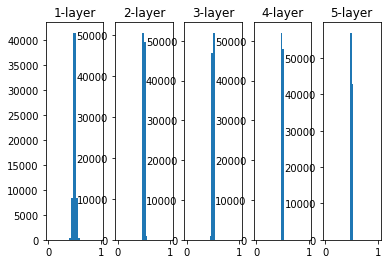

sigmoid 시각화 



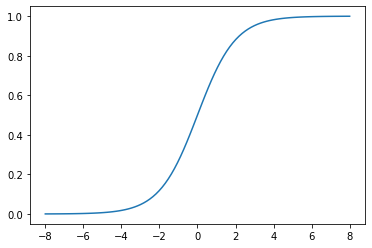

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) 
node_num = 100 
hidden_layer_size = 5
activations = {}
for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) * 0.01 #여기가 바뀐 부분입니다.
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z 
for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

print("sigmoid 시각화 \n")

x = np.linspace(-8, 8, 100)  
sig = sigmoid(x)  

plt.plot(x, sig) 
plt.show()    

⚾위 그래프에 대한 해석

0과 1로 쏠리지 않았지만 0.5 근방으로 집중된 모습. 이렇게 한 값으로 치우치면 표현력이 떨어진다.

다양한 뉴런(parameter)를 둔 의미가 없어진다. 
한개만 둔 것과 차이가 없다. 

**즉 활성화값이 치우치면 표현력이 제한된다**

참고로, 아주 작은 값(0근처)로 출력값(활성화값)이 몰리면 학습 자체가 거의 이루어지지 않음

✅그래서 등장한 적절한 값이 Xavier 초깃값이다.

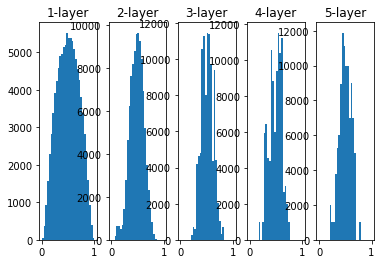

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) 
node_num = 100 
hidden_layer_size = 5
activations = {}
for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num) 
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z 
for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

⚾위 코드에 대한 해석

앞 계층의 노드가 n개라면 표준편차가 1/sqrt(n)인 분포를 사용한다는 원리

앞 층 노드가 많으수록 편차가 작아지니 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다

(위 코드에서는 단순히 모든 충의 노드가 100개라고 가정)

**7. Xavier와 He**

Xavier는 활성화 함수가 선형일때에 해당

Relu 같은 비선형 함수에 특화된 초깃값이 바로 **He 초깃값이다.**

앞 계층의 노드가 n개라면 표준편차가 sqrt(2) /sqrt(n)인 분포를 사용한다는 원리

이렇듯 **가중치(parameter)의 초깃값은 아주 중요하다**